In [1]:
import os, sys
currentFolder = os.path.abspath('')
try:
    sys.path.remove(str(currentFolder))
except ValueError: # Already removed
    pass

projectFolder = 'C:/Users/abjaw/Documents/GitHub/junction-art'
sys.path.append(str(projectFolder))
os.chdir(projectFolder)
print( f"current working dir{os.getcwd()}")

current working dirC:\Users\abjaw\Documents\GitHub\junction-art


In [2]:
from junctions.JunctionBuilderFromPointsAndHeading import JunctionBuilderFromPointsAndHeading
from draw.IntersectionDrawer import IntersectionDrawer
import math
import matplotlib.pyplot as plt

In [3]:
from library.Configuration import Configuration
from junctions.SequentialJunctionBuilder import SequentialJunctionBuilder
from junctions.IntersectionValidator import IntersectionValidator
from junctions.LaneConfiguration import LaneConfigurationStrategies
import pyodrx
import extensions
import numpy as np

configuration = Configuration()
outputDir= os.path.join(os.getcwd(), 'output')
lastId = 0
seed = 4
builder = SequentialJunctionBuilder(minAngle=np.pi/10, 
                                    maxAngle=np.pi * .75, 
                                    straightRoadLen=5, 
                                    probLongConnection=0.5, 
                                    probMinAngle=0.5, 
                                    probRestrictedLane=0.2,
                                    maxConnectionLength=50, 
                                    minConnectionLength=20,
                                    random_seed=seed)

randomState =configuration.get("random_state")
validator = IntersectionValidator()



intersection_array = []




maxNumberOfRoadsPerJunction = 4
minLanePerSide = 1
maxLanePerSide = 2

for sl in range(10):
    path = configuration.get("harvested_straight_roads")
    intersection = builder.createWithRandomLaneConfigurations(path, 
                        sl, 
                        maxNumberOfRoadsPerJunction=maxNumberOfRoadsPerJunction, 
                        maxLanePerSide=maxLanePerSide, 
                        minLanePerSide=minLanePerSide, 
                        internalConnections=True, 
                        cp1=pyodrx.ContactPoint.end,
                        internalLinkStrategy = LaneConfigurationStrategies.SPLIT_ANY,
                        getAsOdr=False)
    intersection_array.append(intersection)


    # odr = intersection.odr
    # # xmlPath = f"output/test_createWithRandomLaneConfigurations-split-any-{maxNumberOfRoadsPerJunction}-{sl}.xodr"
    # xmlPath = f"output/seed-{seed}-{maxNumberOfRoadsPerJunction}-way-{sl}.xodr"
    # odr.write_xml(xmlPath)
    # isValid = validator.validateIncidentPoints(intersection, builder.minConnectionLength)
    # # if isValid == False:
    # #     print(f"{sl} is an invalid intersection")
    # plt = extensions.view_road(odr,os.path.join('..',configuration.get("esminipath")), returnPlt=True)
    # if isValid == False:
    #     plt.title("Invalid")
    # else:
    #     plt.title("Valid")
    # plt.show()
    # extensions.saveRoadImageFromFile(xmlPath, configuration.get("esminipath"))

True
size of connetion polygons  32


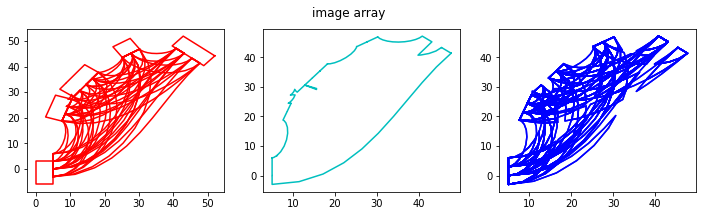

True
size of connetion polygons  28


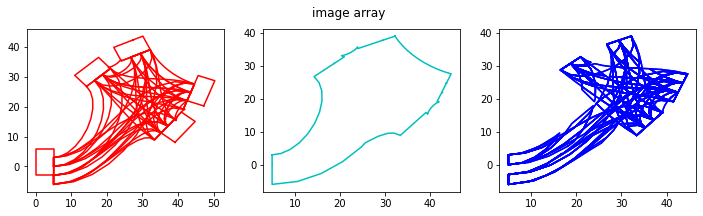

True
size of connetion polygons  28


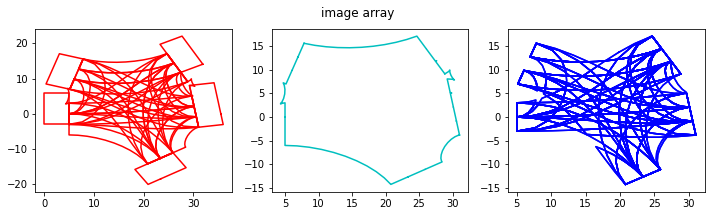

False
True
size of connetion polygons  28


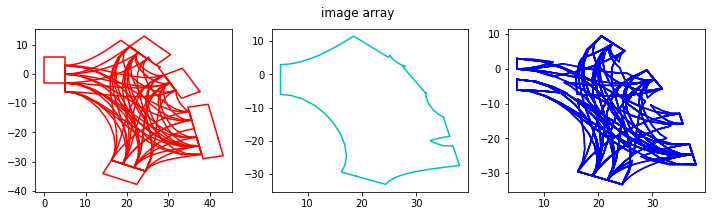

True
size of connetion polygons  28


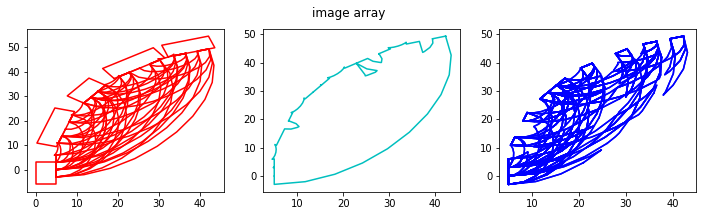

True
size of connetion polygons  24


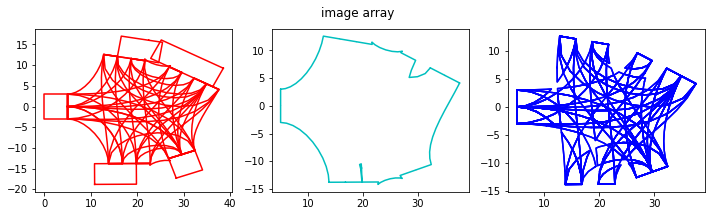

True
size of connetion polygons  32


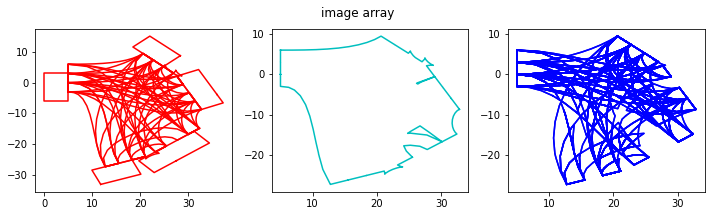

True
size of connetion polygons  32


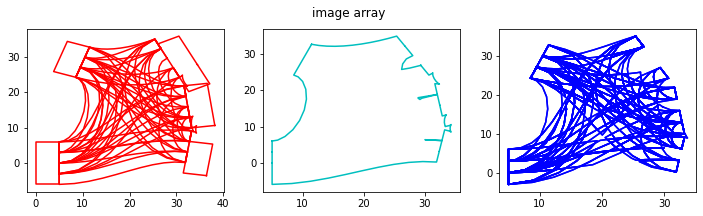

True
size of connetion polygons  24


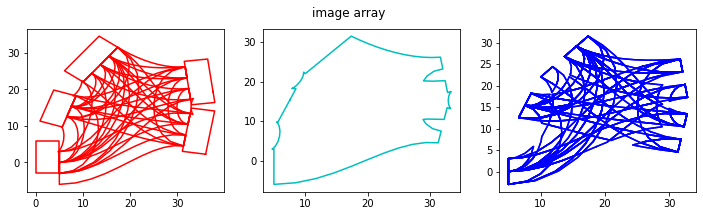

In [4]:
for intersection in intersection_array:
    isValid = validator.validateIncidentPoints(intersection, builder.minConnectionLength)
    print(isValid)

    if isValid:
        intersection_drawer = IntersectionDrawer(intersection, step=0.5)
        intersection_drawer.draw_polygon_image_arr(include_u_turn=True)


In [5]:
# from draw.IntersectionDrawer import IntersectionDrawer
# intersection_drawer = IntersectionDrawer(intersection_array[3], 0.5)
# intersection_drawer.draw_polygon_image_arr(include_u_turn=True)


In [6]:
# intersection_drawer = IntersectionDrawer(intersection_array[0], 0.3)
# intersection_drawer.draw_polygon_image_arr()